## Clase 6: Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy as sp
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
glass = pd.read_csv('Data/glass.csv')

In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Generamos una variables que sea 1 si es del tipo 1 y 0 en otro caso

In [5]:
glass['y'] = (glass['Type'] == 1) * 1

Para ajustar el modelo se requiere de la matriz de diseño y el vector de variables respuestas. En este conjunto de datos no tenemos variables categóricas, pero vamos a categorizar el Ca en dos categorías a modo de ejemplo para observar como se comporta.

In [6]:
glass['Ca'] = (glass['Ca'] < 8) * 1 

Dado que el modelo recibe la matriz X, es necesario generar el intercepto y las variables Dummy, por suerte pandas trae una función que las genera.

In [7]:
dummies = pd.get_dummies(glass['Ca'], prefix='Ca')

In [8]:
dummies.head()

,Ca_0,Ca_1
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


No debieramos incluir todas las dummies, esto es pues genera problemas para invertir la matriz. Vamos a dejar como categoría de referencia que el fierro es mayor que 0.2, es decir la primera dummy.

In [9]:
X = (glass.drop(['y', 'Type', 'Fe', 'Ba'], axis = 1).
         merge(dummies.drop(['Ca_1'], axis = 1), left_index = True, right_index = True))

In [10]:
X['Intercept'] = 1

Los modelos de regresión logística se ajustan en Python de la siguiente forma.

```sm.Logit(y, X)```


In [11]:
fit_1 = sm.Logit(glass['y'], X)

In [12]:
fit_1

el fit 1 no hace nada, sólo inicializa el problema dando los datos. Para ajustar hay que usar el método .fit, la ventaja de esto es que permite ya dejar previamente los datos guardados y sólo ir cambiando los parámetros del fit.


```fit(start_params = None, method = 'newton', maxiter = 35)```

- **start_params:** Si se quiere especificar parametros iniciales. Usuamente no se usa pero puede ser útil cuando no se converge a la solución.
- **method:** Métodos de optimización, por defecto es Newton - Raphson, pero el BFGS también está incluido. También acepta métodos algo más atrevidos como el del Nelder-Mead y la optimización del saltamontes.
- **maxiter:** Número máximo de iteraciones.


In [13]:
results_nr = fit_1.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.425309
         Iterations 12


In [14]:
results_nr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.3272
Time:                        18:52:42   Log-Likelihood:                -91.016
converged:                       True   LL-Null:                       -135.27
                                        LLR p-value:                 2.502e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RI           283.8547    183.928      1.543      0.123     -76.638     644.347
Na             0.0925      0.586      0.158      0.875      -1.057       1.242
Mg             1.8651      0.464      4.022      0.000       0.956       2.774
Al            -1.9751      1.050     -1.882      0.060      -4.032       0.082
Si             1.5632      0.738      2.119      0.034       0.117       3.009
K              0.2430      1.142      0.213      0.832      -1.995       2.481
Ca          -184.2027   1.84e+07     -1e-05      1.000    -3.6e+07     3.6e+07
Ca_0        -182.8841   1.84e+07  -9.94e-06      1.000    -3.6e+07     3.6e+07
Intercept   -367.0867   1.84e+07     -2e-05      1.000   -3.61e+07     3.6e+07
==============================================================================
"""

In [15]:
results_nr.params
#np.exp(results_nr.params)

RI           283.854677
Na             0.092484
Mg             1.865073
Al            -1.975122
Si             1.563195
K              0.242985
Ca          -184.202726
Ca_0        -182.884106
Intercept   -367.086736
dtype: float64

los resultados los pueden guardar en $\LaTeX$, html o simplemente texto o csv (util para exportar a Excel)

In [20]:
results_nr.summary().as_latex()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:} &        y         & \\textbf{  No. Observations:  } &      214    \\\\\n\\textbf{Model:}         &      Logit       & \\textbf{  Df Residuals:      } &      206    \\\\\n\\textbf{Method:}        &       MLE        & \\textbf{  Df Model:          } &        7    \\\\\n\\textbf{Date:}          & Mon, 27 Apr 2020 & \\textbf{  Pseudo R-squ.:     } &   0.3272    \\\\\n\\textbf{Time:}          &     19:40:33     & \\textbf{  Log-Likelihood:    } &   -91.016   \\\\\n\\textbf{converged:}     &       True       & \\textbf{  LL-Null:           } &   -135.27   \\\\\n\\bottomrule\n\\end{tabular}\n\\begin{tabular}{lcccccc}\n                   & \\textbf{coef} & \\textbf{std err} & \\textbf{z} & \\textbf{P$>$$|$z$|$} & \\textbf{[0.025} & \\textbf{0.975]}  \\\\\n\\midrule\n\\textbf{RI}        &     283.8547  &      183.928     &     1.543  &         0.123        &      -76.638    &      644.347     \\\\\n\\textbf{Na}      

In [ ]:
np.exp(results_nr.params)

Puede ser un poco engorroso el tener que hacer un protocolo para ajustar los datos al modelo, a diferencia de R. Buenas noticias, en Python también se puede hacer.

In [21]:
import statsmodels.formula.api as smf

In [22]:
fit_2 = smf.logit(formula = 'y ~ Na + Mg + K**2 + C(Ca) * K', data = glass)
results = fit_2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.459637
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.2729
Time:                        19:41:24   Log-Likelihood:                -98.362
converged:                       True   LL-Null:                       -135.27
                                        LLR p-value:                 1.642e-14
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.2541      6.109      1.024      0.306      -5.719      18.227
C(Ca)[T.1]       1.0514      2.012      0.523      0.601      -2.892       4.995
Na              -0.8741      0.470     -1.859      0.063      -1.796       0.047
Mg               1.7915      0.440      4.070      0.000       0.929       2.654
K               -2.1766      1.118     -1.947      0.052      -4.368       0.015
C(Ca)[T.1]:K    -5.0868      3.840     -1.325      0.185     -12.613       2.440
================================================================================
"""

### Ejemplos selección de variables

Vamos a aplicar shrinkage a nuestro problema. Recuerdan que en el primer ajuste había un montón de variables? hagamos el mismo ajuste penalizado.

In [33]:
fit_3 = smf.logit(formula = 'y ~RI + Na + Mg + Al + Si + K + Ca + Ba + Fe - 1', data = glass)
result_3 = fit_3.fit_regularized(method = 'l1', alpha = 0.5) 

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.44809265429459094
            Iterations: 62
            Function evaluations: 66
            Gradient evaluations: 62


In [34]:
result_3.params

RI    0.000000
Na   -0.666333
Mg    1.331983
Al   -2.653609
Si    0.102244
K     0.000000
Ca   -0.842203
Ba    0.000000
Fe   -0.781106
dtype: float64

### Ejemplo predicción

Primero, vamos a separar conjunto de train y test, la clase pasada lo hicimos manual, pero existen funciones para hacer esto

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
split = train_test_split(glass.index, test_size = 0.3)
train = glass.loc[split[0]]
test = glass.loc[split[1]]

In [37]:
test.shape

(65, 11)

Ajustemos un modelo con todas las variables

In [38]:
fit_4 = smf.logit(formula = 'y ~RI + Na + Mg + Al + Si + K + Fe + Ba + C(Ca)', data = train)
results = fit_4.fit()

Optimization terminated successfully.
         Current function value: 0.424435
         Iterations 12


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  149
Model:                          Logit   Df Residuals:                      139
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.3394
Time:                        20:01:41   Log-Likelihood:                -63.241
converged:                       True   LL-Null:                       -95.738
                                        LLR p-value:                 1.446e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -879.9083    466.497     -1.886      0.059   -1794.226      34.409
C(Ca)[T.1]    -1.9854      1.172     -1.694      0.090      -4.283       0.312
RI           463.6776    262.334      1.768      0.077     -50.487     977.842
Na             0.6182      0.753      0.821      0.412      -0.858       2.094
Mg             2.2043      0.659      3.345      0.001       0.913       3.496
Al            -0.9657      1.296     -0.745      0.456      -3.507       1.575
Si             2.2167      0.969      2.288      0.022       0.318       4.115
K              0.9077      1.125      0.807      0.420      -1.298       3.113
Fe            -1.9167      2.463     -0.778      0.436      -6.743       2.910
Ba            -2.9068      8.456     -0.344      0.731     -19.481      13.667
==============================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Calculemos las probabilidades predichas

In [41]:
preds_test = results.predict(test)

In [42]:
preds_test

183    0.019466
22     0.545015
78     0.107096
159    0.111807
29     0.616784
166    0.117494
7      0.844369
162    0.442399
190    0.001822
189    0.000085
182    0.000533
100    0.147876
56     0.081836
194    0.000008
157    0.746564
65     0.557406
71     0.332559
209    0.000002
205    0.000009
185    0.000398
147    0.353529
141    0.666185
110    0.027736
143    0.328771
62     0.695122
43     0.791944
2      0.116885
125    0.467937
137    0.563957
213    0.000007
         ...   
94     0.491883
83     0.338226
87     0.310849
132    0.762266
44     0.466573
49     0.335195
73     0.106154
61     0.048039
170    0.001937
6      0.784347
16     0.786597
127    0.053126
47     0.928806
204    0.000091
178    0.040909
14     0.771087
171    0.000002
69     0.774096
123    0.057756
122    0.488835
186    0.000080
30     0.622291
60     0.711767
109    0.047938
139    0.157538
86     0.514814
142    0.356438
40     0.716681
144    0.264233
206    0.000013
Length: 65, dtype: float

Para evaluar es útil el módulo metrics de Sklearn

In [43]:
from sklearn import metrics

Calculemos la curva de ROC, esta nos retorna 3 listas, una con el FPR, otra con el TPR y otra con el umbral utilizado.

In [44]:
roc = metrics.roc_curve(test['y'], preds_test)

In [45]:
roc

(array([0.        , 0.        , 0.        , 0.02173913, 0.02173913,
        0.08695652, 0.08695652, 0.10869565, 0.10869565, 0.13043478,
        0.13043478, 0.2173913 , 0.2173913 , 0.32608696, 0.32608696,
        0.5       , 0.5       , 0.56521739, 0.56521739, 0.60869565,
        0.60869565, 1.        ]),
 array([0.        , 0.05263158, 0.15789474, 0.15789474, 0.36842105,
        0.36842105, 0.52631579, 0.52631579, 0.63157895, 0.63157895,
        0.73684211, 0.73684211, 0.78947368, 0.78947368, 0.84210526,
        0.84210526, 0.89473684, 0.89473684, 0.94736842, 0.94736842,
        1.        , 1.        ]),
 array([1.92880573e+00, 9.28805733e-01, 7.91944408e-01, 7.90552691e-01,
        7.71087045e-01, 7.29954686e-01, 6.95121869e-01, 6.66185116e-01,
        6.16784218e-01, 5.63956961e-01, 5.45014537e-01, 4.67936934e-01,
        4.66572783e-01, 3.38226120e-01, 3.35195331e-01, 1.17493818e-01,
        1.16885408e-01, 1.06153908e-01, 8.18358112e-02, 5.31258826e-02,
        4.80387144e-02, 1.68

Si calculamos la matriz de confusión con uno de los umbrales, los resultados debieran ser equivalentes.

In [46]:
umbral = roc[2][10]
preds_val = (preds_test >= umbral) * 1
M = metrics.confusion_matrix(test['y'], preds_val)

In [47]:
umbral

0.5450145373149182

In [48]:
M

array([[40,  6],
       [ 5, 14]], dtype=int64)

In [49]:
tn, fp, fn, tp = M.ravel()

In [50]:
tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

In [53]:
M.ravel()

array([40,  6,  5, 14], dtype=int64)

In [52]:
roc[0][10]

0.13043478260869565

Se ve que los valores cuadran. Podemos obtener el AUC de la siguiente forma

In [54]:
metrics.auc(roc[0], roc[1])

0.839816933638444

0.82, nada mal. Veamos el gráfico de la curva bien rápido.

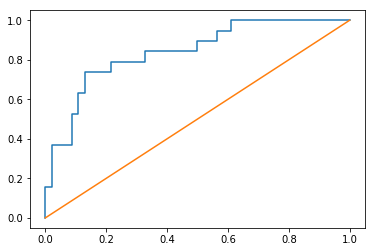

In [55]:
import matplotlib.pyplot as plt

plt.plot(roc[0], roc[1])
plt.plot([0,1], [0,1])
plt.show()

Es importante comparar el ajuste del train vs el test, esto nos da una idea de cuanto cambia el modelo frente a alteraciones del conjunto de datos original.

In [56]:
preds_train = results.predict(train)
roc_train = metrics.roc_curve(train['y'], preds_train)
metrics.auc(roc_train[0], roc_train[1])

0.8581432573029211

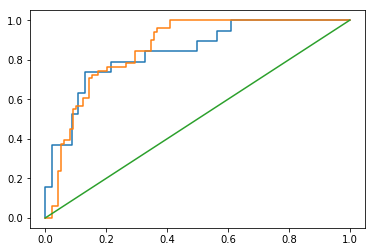

In [57]:
plt.plot(roc[0], roc[1])
plt.plot(roc_train[0], roc_train[1])
plt.plot([0,1], [0,1])
plt.show()

Se puede ver un problema grande, el modelo no tiene buena capacidad de predecir un nuevo conjunto de datos. Motivos de esto puede ser falta de información para predecir casos más generales o bien lo contrario que es sobreajuste. Probemos incorporando más variables.

In [58]:
fit_5 = smf.logit(formula = 'y ~RI + Na + Mg + Al + Si + K + Fe + Ba + RI**2 + Na**2 + Na*Mg + K*Ca + Ba**2 + Al*K', data = train)
results_5 = fit_5.fit()

Optimization terminated successfully.
         Current function value: 0.422593
         Iterations 12


In [59]:
preds_test5 = results_5.predict(test)
roc_5 = metrics.roc_curve(test['y'], preds_test5)
metrics.auc(roc_5[0], roc_5[1])

0.8512585812356979

In [60]:
preds_train5 = results_5.predict(train)
roc_train_5 = metrics.roc_curve(train['y'], preds_train5)
metrics.auc(roc_train_5[0], roc_train_5[1])

0.862545018007203

Notar que este último caso se pierde mucho en interpretación y probablemente no sirva para eso. Por último, un pequeño tip, con patsy se puede obtener las matrices a partir de una formula.

In [61]:
import patsy
y, X = patsy.dmatrices('y ~ RI + Na + Mg + Al + Si + K + Ca + Ba + Al + RI**2 + Na**2 + Na*Mg + K*Ca + Ba**2 + Al*K - 1', data = train, return_type='dataframe')

In [62]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Na:Mg,K:Ca,Al:K
188,1.52247,14.86,2.20,2.06,70.26,0.76,0.0,0.00,32.6920,0.00,1.5656
184,1.51115,17.38,0.00,0.34,75.41,0.00,1.0,0.00,0.0000,0.00,0.0000
39,1.52213,14.21,3.82,0.47,71.77,0.11,0.0,0.00,54.2822,0.00,0.0517
153,1.51610,13.42,3.40,1.22,72.69,0.59,0.0,0.00,45.6280,0.00,0.7198
64,1.52172,13.48,3.74,0.90,72.01,0.18,0.0,0.00,50.4152,0.00,0.1620
41,1.51755,12.71,3.42,1.20,73.20,0.59,0.0,0.00,43.4682,0.00,0.7080
48,1.52223,13.21,3.77,0.79,71.99,0.13,0.0,0.00,49.8017,0.00,0.1027
164,1.51915,12.73,1.85,1.86,72.69,0.60,0.0,0.00,23.5505,0.00,1.1160
160,1.51832,13.33,3.34,1.54,72.14,0.56,0.0,0.00,44.5222,0.00,0.8624
31,1.51747,12.84,3.50,1.14,73.27,0.56,0.0,0.00,44.9400,0.00,0.6384
